In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm

from energy_consumption.feature_selection.extract import extract_energy_data, extract_all_features
from energy_consumption.help_functions import get_forecast_timestamps, create_submission_frame

In [3]:
energydata = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\feature_selection\\data\\historical_data.csv')
energydata['date_time'] = pd.to_datetime(
    energydata['date_time'], format='%Y-%m-%d %H:%M:%S')
energydata = energydata.set_index("date_time")

In [4]:
energydata_knn = extract_all_features.get_energy_and_standardized_features(energydata, knn=True)
energydata_knn

2016-12-26 00:00:00
2023-11-23 12:00:00


,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,...,year_2022,year_2023,year_2024,holiday,sun_hours,tavg,wspd,index,population,energy_consumption
date_time,,,,,,,,,,,,,,,,,,,,,
2016-12-26 00:00:00,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,...,-0.411308,-0.384936,0.0,5.355087,-1.499845,-0.514633,1.989731,-0.780066,-1.726775,41.81025
2016-12-26 01:00:00,4.795377,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,...,-0.411308,-0.384936,0.0,5.355087,-1.499845,-0.514633,1.989731,-0.780066,-1.726775,39.73950
2016-12-26 02:00:00,-0.208534,4.795377,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,...,-0.411308,-0.384936,0.0,5.355087,-1.499845,-0.514633,1.989731,-0.780066,-1.726775,38.78525
2016-12-26 03:00:00,-0.208534,-0.208534,4.795377,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,...,-0.411308,-0.384936,0.0,5.355087,-1.499845,-0.514633,1.989731,-0.780066,-1.726775,38.96900
2016-12-26 04:00:00,-0.208534,-0.208534,-0.208534,4.795377,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,...,-0.411308,-0.384936,0.0,5.355087,-1.499845,-0.514633,1.989731,-0.780066,-1.726775,39.18750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 08:00:00,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,4.795377,-0.208534,-0.208534,...,-0.411308,2.597836,0.0,-0.186738,-1.266314,-1.520067,-0.580195,-1.968927,1.766780,65.75125
2023-11-22 09:00:00,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,4.795377,-0.208534,...,-0.411308,2.597836,0.0,-0.186738,-1.266314,-1.520067,-0.580195,-1.968927,1.766780,67.40950
2023-11-22 10:00:00,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,-0.208534,4.795377,...,-0.411308,2.597836,0.0,-0.186738,-1.266314,-1.520067,-0.580195,-1.968927,1.766780,68.26775


In [5]:
y = energydata_knn[['energy_consumption']]
X = energydata_knn.drop(columns=['energy_consumption'])

In [16]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.metrics import mean_squared_error

import statistics

y = energydata[['energy_consumption']]
X = energydata.drop(columns=['energy_consumption'])

# Time Series Split
tscv = TimeSeriesSplit(n_splits=5, test_size=100)

rf = []
xgb = []
knn = []
#rnr = []


for train_index, test_index in tscv.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Random Forest Regression
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)

    # XGBoost Regression
    xgb_model = XGBRegressor()
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)

    # KNNRegression
    knn_model = KNeighborsRegressor(n_neighbors=11, weights='uniform')
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)

    # Radius Neigbors
    # rnr_model = RadiusNeighborsRegressor(weights='distance')
    # rnr_model.fit(X_train, y_train)
    # rnr_predictions = rnr_model.predict(X_test)

    # Evaluate the models
    rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
    rf.append(rf_rmse)

    xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
    xgb.append(xgb_rmse)

    knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)
    knn.append(knn_rmse)

rmse_means = {'RandomForestRegressor MSPE': statistics.mean(rf),
              'XGBoost MSPE': statistics.mean(xgb),
              'KNeighborsRegressor MSPE': statistics.mean(knn)}
rmse_means

c:\Users\Maria\Documents\Setups\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Maria\Documents\Setups\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Maria\Documents\Setups\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Maria\Documents\Setups\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

{'RandomForestRegressor RMPE': 5.595040690169112,
 'XGBoost RMPE': 5.594709816325848,
 'KNeighborsRegressor RMPE': 6.131172388918346}

Idea: 
Time Series Split in general good, but better to have smaller test sets (100), since no predictions above this horizon are to be done
--> Do customized cross-validation to derive optimal k

In [5]:
starting_point = int(len(energydata_knn)/2)
num_intervals = 10
interval_length = int(starting_point/num_intervals)

splits = list(range(0, num_intervals))
k_range = list(range(1,31))

mspes = {}

for k in k_range: 

    print('start of round -------', k, '-----------')

    curr_mspes = []
    
    for s in splits:

        # find best k for desired prediction range
        X_train = X.iloc[:starting_point+s*interval_length]
        X_test = X.iloc[starting_point+s*interval_length:][47:79]
        y_train = y.iloc[:starting_point+s*interval_length]
        y_test = y.iloc[starting_point+s*interval_length:][47:79]

        # Create a KNeighborsRegressor instance
        knn_model = KNeighborsRegressor(n_neighbors=k, weights='distance')
        knn_model.fit(X_train, y_train)
        knn_predictions = knn_model.predict(X_test)
        mspe = mean_squared_error(y_test, knn_predictions)

        curr_mspes.append(mspe)

    mspes.update({k: curr_mspes})

start of round ------- 1 -----------


c:\Users\Maria\Documents\Setups\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Maria\Documents\Setups\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Maria\Documents\Setups\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Maria\Documents\Setups\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Maria\Documents\Setups\Lib\subprocess.py", line 1538, in _execute_child
    h

start of round ------- 2 -----------
start of round ------- 3 -----------
start of round ------- 4 -----------
start of round ------- 5 -----------
start of round ------- 6 -----------
start of round ------- 7 -----------
start of round ------- 8 -----------
start of round ------- 9 -----------
start of round ------- 10 -----------
start of round ------- 11 -----------
start of round ------- 12 -----------
start of round ------- 13 -----------
start of round ------- 14 -----------
start of round ------- 15 -----------
start of round ------- 16 -----------
start of round ------- 17 -----------
start of round ------- 18 -----------
start of round ------- 19 -----------
start of round ------- 20 -----------
start of round ------- 21 -----------
start of round ------- 22 -----------
start of round ------- 23 -----------
start of round ------- 24 -----------
start of round ------- 25 -----------
start of round ------- 26 -----------
start of round ------- 27 -----------
start of round -----

In [1]:
knn_predictions

NameError: name 'knn_predictions' is not defined

In [11]:
import statistics
mean_dict={}
var_dict={}
for k in k_range: 
    mean_dict.update({k:statistics.mean(mspes[k])})
    var_dict.update({k: np.var(mspes[k])})

mean_dict
var_dict

{1: 434.3288893178893,
 2: 309.1070193913666,
 3: 286.51378099303895,
 4: 268.3029734801113,
 5: 287.97937407862224,
 6: 186.4527259590064,
 7: 223.8044358632134,
 8: 206.51183371716584,
 9: 238.2184352874031,
 10: 230.0219584415354,
 11: 178.26716318337256,
 12: 162.4235532751905,
 13: 183.98014381950858,
 14: 194.04267766169673,
 15: 227.0702164760732,
 16: 262.07785547179964,
 17: 287.5617617913176,
 18: 321.56169012683165,
 19: 348.0473518727744,
 20: 383.39830167666,
 21: 432.41751759499596,
 22: 374.1499232798609,
 23: 383.83993865821026,
 24: 402.66476086907005,
 25: 399.2572796058695,
 26: 409.84403438849677,
 27: 412.38316816209533,
 28: 409.006500211428,
 29: 404.38683270530663,
 30: 393.3909728545473}

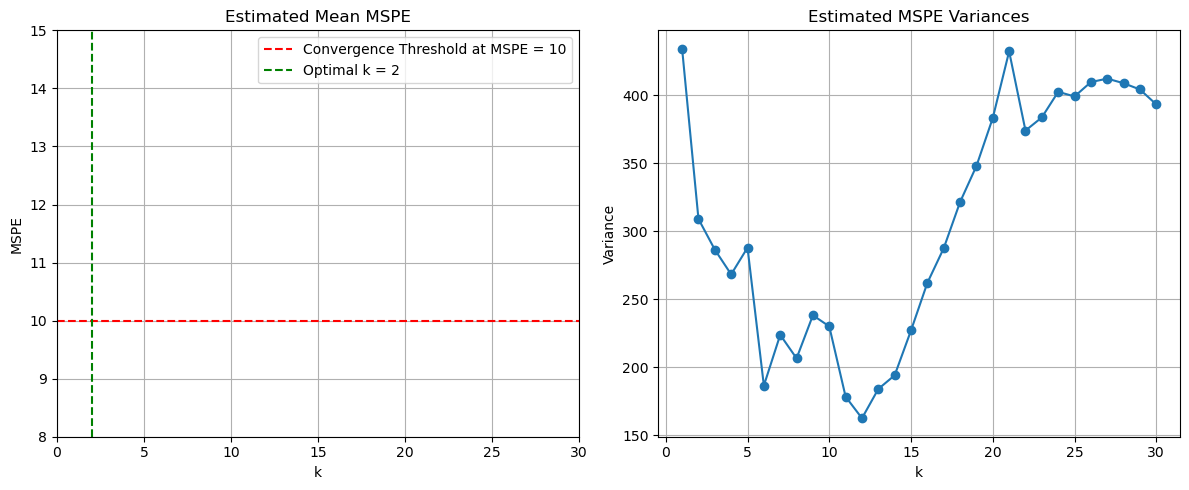

In [23]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Extract keys and values from the dictionary
k_values = list(mean_dict.keys())
mspe_values = list(mean_dict.values())
mspe_values = list(var_dict.values())

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph on ax1
ax1.plot(k_values, mspe_values, marker='o', linestyle='-')
ax1.axhline(y=10, color='r', linestyle='--',
            label='Convergence Threshold at MSPE = 10')
ax1.axvline(x=2, color='g', linestyle='--', label='Optimal k = 2')
ax1.fill_between(list(range(8, 10)), 0, color='red', alpha=0.3)
ax1.set_title('Estimated Mean MSPE')
ax1.set_xlabel('k')
ax1.set_ylabel('MSPE')
ax1.set_xlim(0, 30)
ax1.set_ylim(8, 15)
ax1.grid(True)
ax1.legend(loc='upper right')

# Plot the second graph on ax2 (assuming you have variances defined)
var_values = list(var_dict.values())
ax2.plot(k_values, var_values, marker='o', linestyle='-')
ax2.set_title('Estimated MSPE Variances')
ax2.set_xlabel('k')
ax2.set_ylabel('Variance')
ax2.grid(True)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plots
plt.show()

Nehme k=11 wegen Sicherheit

Überlegung: 
* Varianz großzügig geschätzt (nur Hälfte der Datenpunkte)

In [78]:
# get distribution of residuals for index 47
starting_point = int(len(energydata_knn)/2)
num_intervals = 10                                                                # adjust 1000
interval_length = int(starting_point/num_intervals)

splits = list(range(0, num_intervals))
indexes = list(range(101))

residuals = {}
distances = {}

for i in indexes: 
    residuals.update({i: []})
    distances.update({i: []})


for s in splits:

    X_train = X.iloc[:starting_point+s*interval_length]
    y_train = y.iloc[:starting_point+s*interval_length]

    # Create a KNeighborsRegressor instance
    knn_model = KNeighborsRegressor(
        n_neighbors=11, weights='distance')  # adjust
    knn_model.fit(X_train, y_train)

    for i in indexes:
        X_test = np.array(
            X.iloc[starting_point+s*interval_length+i, :]).reshape(1, -1)
        y_test = y.iloc[starting_point+s*interval_length+i, 0]
        knn_prediction = knn_model.predict(X_test)[0][0]

        # calculate residual
        residual = y_test - knn_prediction
        residuals[i].append(residual)

        # calculate mean distance from x to its data points
        neigh_dist, neigh_ind = knn_model.kneighbors(X_test, 11)
        distances[i].append(np.mean(neigh_dist))                        #proxy ---> no inverse
        

residuals
distances

c:\Users\Maria\Documents\Setups\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\Maria\Documents\Setups\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\Maria\Documents\Setups\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\Maria\Documents\Setups\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\Maria\Documents\Setups\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\Maria\Documents\Setups\Lib\site

KeyboardInterrupt: 

In [42]:
# Store calculated data in Frame
simulated_residuals = pd.DataFrame()
for i in indexes: 
    name = f'index_{i}'
    simulated_residuals[name] = residuals[i]

df = pd.DataFrame.from_dict(distances, orient='index')
df_mean = df.mean(axis=1)
simulated_distances = pd.DataFrame({'index': indexes, 'mean_distance': df_mean})

# export residuals to avoid additional computational effort
simulated_residuals.to_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\residuals.csv', index=False)

# export distances to avoid additional computational effort
simulated_distances.to_csv(
     'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\distances.csv', index=False)

In [81]:
residuals_means=[]
residuals_variances=[]
for i in indexes: 
    residuals_means.append(np.mean(residuals[i]))
    residuals_variances.append(np.var(residuals[i]))
df_descriptive = pd.DataFrame({'index': indexes, 
                               'mean': residuals_means, 
                               'variance': residuals_variances})
df_descriptive


,index,mean,variance
0,47,-0.336781,13.805116
1,51,-0.365894,15.522069
2,55,-0.310562,16.895561
3,71,-0.389621,11.824785
4,75,-0.481228,13.994404
5,79,-0.420089,16.794657


Interesting: 
* Variance increases with hour increasing (within day)
* MSEP at 20:00 lower than for 16:00 

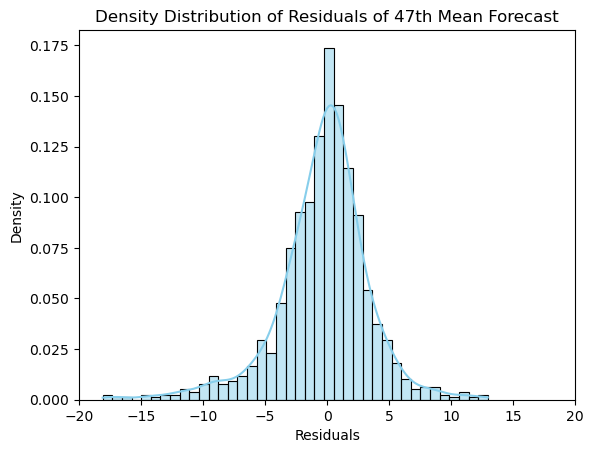

In [98]:
import seaborn as sns

array_47 = np.array(residuals[47])

# Create a density plot using seaborn
sns.histplot(array_47, kde=True, stat="density", color="skyblue", bins=40)

# Add labels and title
plt.xlabel('Residuals')
plt.xlim(-20,20)
plt.ylabel('Density')
plt.title('Density Distribution of Residuals of 47th Mean Forecast')

# Show the plot
plt.show()

In [43]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor

from energy_consumption.feature_selection.extract import extract_energy_data, extract_all_features
from energy_consumption.models.knn.drop_years import drop_years
from energy_consumption.help_functions import get_forecast_timestamps, create_submission_frame

In [79]:
energydata = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\feature_selection\\data\\historical_data.csv')
energydata['date_time'] = pd.to_datetime(
    energydata['date_time'], format='%Y-%m-%d %H:%M:%S')
energydata = energydata.set_index("date_time")
energydata

,energy_consumption
date_time,
2016-12-26 00:00:00,41.81025
2016-12-26 01:00:00,39.73950
2016-12-26 02:00:00,38.78525
2016-12-26 03:00:00,38.96900
2016-12-26 04:00:00,39.18750
...,...
2023-11-22 08:00:00,65.75125
2023-11-22 09:00:00,67.40950
2023-11-22 10:00:00,68.26775


In [97]:
residuals = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\residuals.csv')
distances = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\models\\knn\\distances.csv')

def get_quantiles(mean_est, neighbor_distances, indexes, quantiles):

    column_names = [f'q{q}' for q in quantiles]
    quantile_df = pd.DataFrame(columns=column_names)

    # input two np.arrays
    for i in indexes:

        # weighten percentiles by distance ration
        mean_distance = np.mean(neighbor_distances[i])
        distance_ratio = mean_distance/distances.iloc[i, 1]

        # estimate quantile
        name = f'index_{i}'
        print(np.array(mean_est[i] + distance_ratio*np.percentile(residuals[name], [2.5, 25, 50, 75, 97.5])))
        quantile_df.loc[i] = np.array(mean_est[i] + distance_ratio*np.percentile(residuals[name], [2.5, 25, 50, 75, 97.5]))

    return quantile_df

In [103]:
def get_KNNRegression_forecasts(energydata=np.nan, indexes=[47, 51, 55, 71, 75, 79], quantiles=[0.025, 0.25, 0.5, 0.75, 0.975], periods = 100):

    if type(energydata) == float:
        # use derived optimum for number of years
        energydata = extract_energy_data.get_data(num_years=7)

    energydata = extract_all_features.get_energy_and_standardized_features(
        energydata, knn=True)

    X = energydata.drop(columns=['energy_consumption'])
    y = energydata['energy_consumption']

    # create dataframe to store forecast quantiles
    energyforecast = get_forecast_timestamps.forecast_timestamps(
        energydata.index[-1])

    X_pred = extract_all_features.get_energy_and_standardized_features(
        energyforecast, knn=True)

    X, X_pred = drop_years(X, X_pred)

    # fit KNNRegression with best k
    knn_model = KNeighborsRegressor(n_neighbors=11, weights='distance')

    # Fit the model on the scaled data
    knn_model.fit(X, y)

    # estimate forecast mean
    mean_est = knn_model.predict(X_pred)
    neighbor_distances, neighbor_indizes = knn_model.kneighbors(X_pred, 11)

    # estimate quantile forecasts
    quantile_forecasts = get_quantiles(
        mean_est, neighbor_distances, indexes, quantiles)

    # return quantile forecasts in terms of absolute evaluation
    abs_eval = len(quantiles) != 6
    if abs_eval == True:
        horizon = pd.date_range(start=energydata.index[-1] + pd.DateOffset(
            hours=1), periods=periods, freq='H')
        quantile_forecasts.insert(
            0, 'date_time', [horizon[i] for i in indexes])

        return quantile_forecasts

    # else: create submission frame
    else:
        forecast_frame = create_submission_frame.get_frame(
            quantile_forecasts, indexes)
        forecast_frame = forecast_frame.drop(columns={'index'})
        horizon = pd.date_range(start=energydata.index[-1] + pd.DateOffset(
            hours=1), periods=periods, freq='H')
        forecast_frame.insert(
            0, 'date_time', [horizon[i] for i in indexes])

        return forecast_frame

In [104]:
ff = get_KNNRegression_forecasts(energydata)
ff


2016-12-26 00:00:00
2023-11-23 12:00:00
2023-11-22 13:00:00
2023-11-27 16:00:00
[68.689517   71.17972171 72.47284191 74.44487986 76.14521535]
[59.84966181 67.43598033 68.6756821  71.0137596  72.06591459]
[56.88364943 63.80886105 65.05496775 66.69240715 67.82407914]
[54.96257652 58.39604062 59.65686295 61.07176253 61.87450857]
[52.35972892 53.54350614 56.02586896 59.00739004 60.17906133]
[50.87995183 52.8733498  54.92261171 57.2280071  58.94581416]


,date_time,q0.025,q0.25,q0.5,q0.75,q0.975
47,2023-11-24 12:00:00,68.689517,71.179722,72.472842,74.444880,76.145215
51,2023-11-24 16:00:00,59.849662,67.435980,68.675682,71.013760,72.065915
55,2023-11-24 20:00:00,56.883649,63.808861,65.054968,66.692407,67.824079
71,2023-11-25 12:00:00,54.962577,58.396041,59.656863,61.071763,61.874509
75,2023-11-25 16:00:00,52.359729,53.543506,56.025869,59.007390,60.179061
79,2023-11-25 20:00:00,50.879952,52.873350,54.922612,57.228007,58.945814


In [18]:
mean_est = get_KNNRegression_forecasts(energydata)
mean_est

2016-12-26 00:00:00
2023-11-23 12:00:00
2023-11-22 13:00:00
2023-11-27 16:00:00


array([71.98059954, 68.33668493, 64.65627011, 61.03052997, 58.55340781,
       57.54203149])